# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [27]:
# Import necessary packages
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk
import string

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

# To retrieve the set of English stopwords
sw = stopwords.words("english")

In [28]:
# Add any additional import statements you need here
from nltk.tokenize import word_tokenize
import emoji
import re

In [29]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/annie/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [87]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    
    if verbose :        
        print(f"There are {len(tokens)} tokens in the data.")
        print(f"There are {len(set(tokens))} unique tokens in the data.")
        print(f"There are {len(''.join(tokens))} characters in the data.")
        print(f"The lexical diversity is {len(set(tokens))/len(tokens):.3f} in the data.")
    
        # print the five most common tokens
        counts = Counter(tokens)
        
        if num_tokens > 0:
            print(counts.most_common(num_tokens))
        
    return([len(tokens), 
            len(set(tokens)),
            len("".join(tokens)),
            len(set(tokens))/len(tokens)])

In [89]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(descriptive_stats(text, verbose=False)[2] == 55)
assert(abs(descriptive_stats(text, verbose=False)[3] - 0.69) < 0.02)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial because it allows you to validate assumptions and verify the accuracy of your code by checking if specific conditions or expectations are met. It makes identifying errors much easier at an early stage.  

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [32]:
# Read in the lyrics data
lyrics_data = defaultdict(dict)

for item in os.listdir(data_location + lyrics_folder):
    if os.path.isdir(data_location + lyrics_folder + item):
        for lyrics_page in os.listdir(data_location + lyrics_folder + item):
            artist,song = lyrics_page.split("_")
            song = song.replace(".txt", "")
            lyrics_data[item][song] = open(data_location + lyrics_folder + item + "/" + lyrics_page).read()

In [33]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]

twitter_data = defaultdict(list)

for f in desc_files :
    artist = f.split("_")[0]
        
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            
            line = line.strip().split("\t")
            
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [34]:
punctuation = set(punctuation) # speeds up comparison

In [39]:
# create your clean twitter data here
descs_processed = defaultdict(list)

for artist in twitter_data:
    
    descriptions = " ".join(twitter_data[artist])
        
    # Remove punctuation
    descriptions = "".join([ch for ch in descriptions if ch not in punctuation])
        
    # Case fold and tokenize on whitespace
    descriptions = [item.lower().strip() for item in descriptions.split()]
        
    # Remove stopwords
    descriptions = [item for item in descriptions if item not in sw]
        
    descs_processed[artist].extend(descriptions)

In [35]:
# create your clean lyrics data here
lyrics_processed = defaultdict(list)

for artist in lyrics_data:
    for song in lyrics_data[artist]:
        
        # Remove punctuation
        lyrics = "".join([ch for ch in lyrics_data[artist][song] if ch not in string.punctuation])
        
        # Case fold and tokenize on whitespace
        lyrics = [item.lower().strip() for item in lyrics.split()]
        
        # Remove stopwords
        lyrics = [item for item in lyrics if item not in sw]
        
        lyrics_processed[artist].extend(lyrics)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [90]:
# calls to descriptive_stats on cher lyrics data
descriptive_stats(lyrics_processed['cher'], num_tokens = 10)

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333), ('time', 319), ('baby', 319), ('see', 308), ('oh', 306), ('one', 282)]


[35916, 3703, 172634, 0.10310168170174852]

In [93]:
# calls to descriptive_stats on robyn lyrics data
descriptive_stats(lyrics_processed['robyn'], num_tokens = 10)

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
[('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251), ('like', 232), ('baby', 222), ('youre', 169), ('never', 155), ('dance', 150)]


[15227, 2156, 73787, 0.14159059565245943]

In [94]:
# calls to descriptive_stats on cher twitter data
descriptive_stats(descs_processed['cher'], num_tokens = 10)

There are 15670504 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951718 characters in the data.
The lexical diversity is 0.097 in the data.
[('love', 214576), ('im', 139098), ('life', 122980), ('music', 88177), ('de', 72974), ('follow', 62585), ('lover', 60347), ('like', 58592), ('mom', 53737), ('sheher', 47208)]


[15670504, 1517718, 92951718, 0.09685189448916257]

In [95]:
# calls to descriptive_stats on robyn twitter data
descriptive_stats(descs_processed['robynkonichiwa'], num_tokens = 10)

There are 1495526 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127817 characters in the data.
The lexical diversity is 0.169 in the data.
[('music', 15147), ('love', 11677), ('im', 9051), ('och', 7922), ('life', 7383), ('de', 6383), ('follow', 5600), ('like', 4945), ('en', 4833), ('•', 4829)]


[1495526, 252736, 9127817, 0.16899472158959455]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If stopwords were left in the data, common words like "and," "the," and "is" would likely be on the top word list. It will  reduce the significance of other more meaningful or informative words.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I previously believe that the lexical diversity between the artists are higher. However, it turns out that the lexical diversity for both artists is quite low, which doesn't conform to my prior beliefs. 


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [45]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [46]:
emojis = defaultdict(list)

for artist in twitter_data:
    for desc in twitter_data[artist]:
        emojis[artist].extend([ch for ch in desc if emoji.is_emoji(ch)])

In [47]:
for artist in emojis:
    print(artist)
    print(Counter(emojis[artist]).most_common(10))

cher
[('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
robynkonichiwa
[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [48]:
hashtags = defaultdict(list)

for artist in twitter_data:
    for desc in twitter_data[artist]:
        hashtags[artist].extend([item.lower() for item in desc.split() if item.startswith('#')])

In [49]:
for artist in hashtags:
    print(artist)
    print(Counter(hashtags[artist]).most_common(10))

cher
[('#resist', 9558), ('#blm', 8753), ('#blacklivesmatter', 7432), ('#fbr', 2922), ('#theresistance', 2883), ('#resistance', 2405), ('#1', 2226), ('#', 1965), ('#voteblue', 1897), ('#lgbtq', 1457)]
robynkonichiwa
[('#blacklivesmatter', 563), ('#blm', 324), ('#music', 260), ('#1', 187), ('#', 150), ('#teamfollowback', 117), ('#edm', 104), ('#resist', 76), ('#freebritney', 63), ('#lgbtq', 58)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [50]:
title_tokens = defaultdict(list)

for artist in lyrics_data:
    for song, page in lyrics_data[artist].items():
        
        page = page.split("\n")
        
        title_tokens[artist].extend([item.lower() for item in page[0].split()])

In [51]:
for artist in title_tokens:
    print(artist)
    print(Counter(title_tokens[artist]).most_common(5))

cher
[('the', 29), ('to', 28), ('"the', 24), ('of', 21), ('"i', 21)]
robyn
[('you', 7), ('the', 7), ('me', 7), ('my', 6), ('to', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

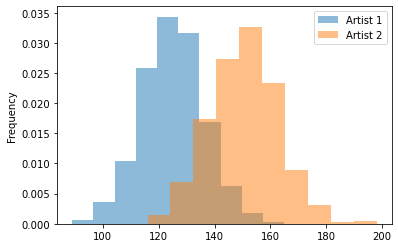

In [52]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

In [55]:
# Put the songs in dataframes and make a new column that maps the 
# tokenize function over them then new one for lengths

artist_vec = []
song_vec = []
lyrics_vec = []

for artist in lyrics_data:
    for song, lyrics in lyrics_data[artist].items():
        artist_vec.append(artist)
        song_vec.append(song)
        lyrics_vec.append(lyrics)
        
lyrics_df = pd.DataFrame()
lyrics_df['artist'] = artist_vec
lyrics_df['song'] = song_vec
lyrics_df['lyrics'] = lyrics_vec

lyrics_df.head()

,artist,song,lyrics
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: `'\s'` matches any whitespace character; `'+'` matches the previous token between one and unlimited times; It means that `'\s+'`will match on consecutive whitespace characters in a string. 

In [56]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lyric_len, dtype: object

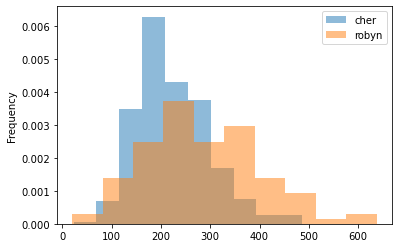

In [57]:
# Your lyric length comparison chart here. 
lyrics_df['lyric_token'] = lyrics_df['lyrics'].apply(tokenize_lyrics)
lyrics_df['lyric_len'] = lyrics_df['lyric_token'].apply(len)

lyrics_df.groupby('artist')['lyric_len'].plot(kind="hist",density=True,alpha=0.5,legend=True)